# Exercise 1

**(1)** Forecasting with linear models:
> **(a)** Estimate four linear models unsing the OLS estimator

> **(b)** Forecast n steps ahead using the estimated models

> **(c)** Forecast n steps ahead (recursively) using the estimated models

> **(d)** Compute confidence intervals for both **(b)** and **(c)** forecasts

In [3]:
library(data.table)
library(readr)
library(here)

## (a) Estimate four linear models unsing the OLS estimator

The linear regression model (LRM) can be written as follows:

$
\mathbf{y} = X\mathbf{\beta} + \mathbf{\epsilon}
$

where $\mathbf{y}$ is a Tx1 vector of dependent variables, $X$ is a Txk matrix of independen variables, $\mathbf{\beta}$ is a kx1 vector of parameters, and $\mathbf{\epsilon}$ is a Tx1 vector of independent error terms.

The LRM assumptions are:

> A1. $\mathbf{E}[\mathbf{\epsilon}]=0$

> A2. $\mathbf{E}[\mathbf{\epsilon}^{'}\mathbf{\epsilon}]=\sigma^2\mathbf{I}$

> A3. $X \perp \!\!\! \perp \mathbf{\epsilon}$

> A4. $X^{'}X$ is non singular

> A5. $X$ is weekly stationary

Furthermore, the parameters $\mathbf{\beta}$ can be estimated using the ordinary least squares (OLS) method. This method seeks to find the vector $\mathbf{\beta}$ that solves the following optimization problem:

$
argmax_{\mathbf{\beta}} SSE(X, \mathbf{y}; \mathbf{\beta}) \quad SSE = \mathbf{\epsilon}^{'}\mathbf{\epsilon} = (\mathbf{y} - X\mathbf{\beta})^{'}(\mathbf{y} - X\mathbf{\beta})
$

which has the following solution:

$
\hat{\mathbf{\beta}} = (X^{'}X)^{-1}X^{'}\mathbf{y}
$

For the variance, the OLS estimator ir given by:

$
\hat{\mathbf{\sigma}}^2 = \frac{\hat{\mathbf{\epsilon}}^{'}\hat{\mathbf{\epsilon}}}{T-k} \quad where \quad \hat{\mathbf{\epsilon}} = \mathbf{y} - X\hat{\mathbf{\beta}}
$

It is possible to show that, under the assumtions A1-A5, the OLS estimator is the best linear unbiased estimator and has the lowest variance in this class.


In [5]:
df = readr::read_csv(here("src", "data", "ex2_regress_gdp.csv"))
head(df)

Parsed with column specification:
cols(
  date = col_character(),
  ea_esi = col_double(),
  ea_gdp = col_double(),
  ea_ip = col_double(),
  ea_prodpr = col_double(),
  eurostoxx = col_double(),
  ipr = col_double(),
  pr = col_double(),
  sr = col_double(),
  su = col_double(),
  y = col_double()
)


date,ea_esi,ea_gdp,ea_ip,ea_prodpr,eurostoxx,ipr,pr,sr,su,y
1/1/1996,94.56667,1493012,86.55,77.13,49.3,-0.4265874,0.40000000,8.241198,-4.007445,-0.01904023
4/1/1996,93.20000,1504560,86.36,77.15,51.8,-0.2197676,0.13333333,4.946607,-1.455733,0.77048056
7/1/1996,94.33333,1512778,86.65,77.09,50.9,0.3352411,0.06666667,-1.752723,1.208689,0.54469339
10/1/1996,97.70000,1517439,86.98,77.40,54.6,0.3801191,0.13333333,7.017096,3.506695,0.30761525
1/1/1997,100.36667,1522744,87.99,77.62,62.7,1.1544964,0.23333333,13.832756,2.692859,0.34899919
4/1/1997,103.36667,1541912,89.67,77.86,67.9,1.8913093,0.06666667,7.967459,2.945239,1.25097564


Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"

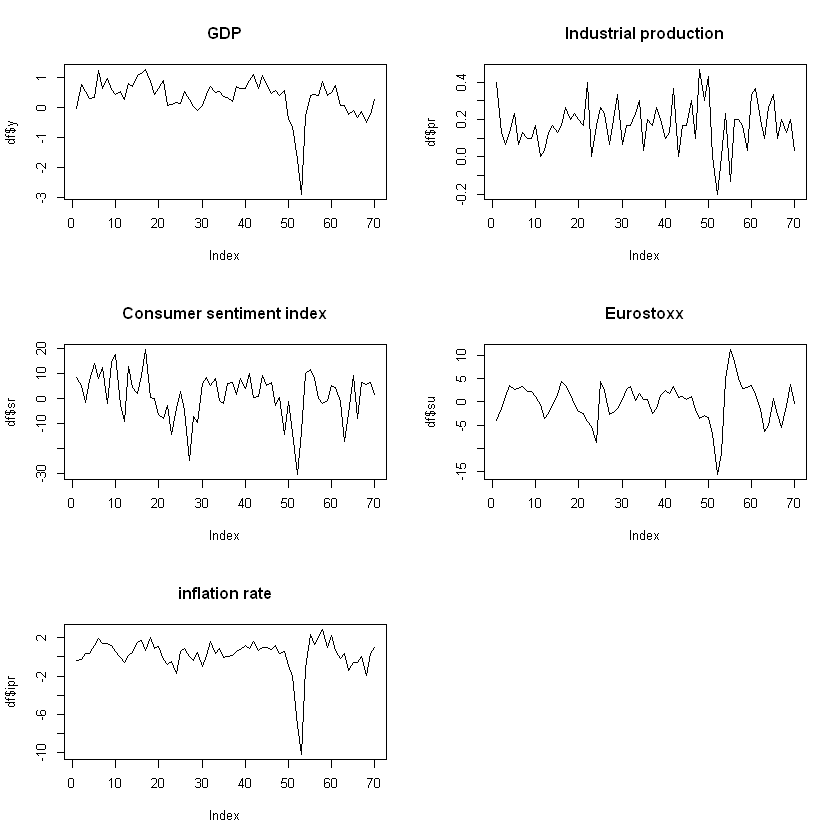

In [66]:
par(mfrow=c(3, 2))
plot(df$y, type = 'line', main = 'GDP')
plot(df$pr, type = 'line', main = 'Industrial production')
plot(df$sr, type = 'line', main = 'Consumer sentiment index')
plot(df$su, type = 'line', main = 'Eurostoxx')
plot(df$ipr, type = 'line', main = 'inflation rate')

By doing a quick check on the time series under analysis it seems that some of the LRM hypothesis may be violated. For instance, all the series seems to have a variance that is not constant over time, violating the A2 assumption. Furthermore, the GDP series, in particular, has an outlier in its history, which may undermine the standard error estimates of the OLS.

Despite these facts, we estimate four specifications of the LRM as follows:

$
gdp_t = \beta_1 ipr_t + \beta_2 su_t + \beta_3 pr_t + \beta_4 sr_t + \epsilon_t
$

$
gdp_t = \beta_1 ipr_t + \beta_2 su_t + \beta_3 sr_t + \epsilon_t
$

$
gdp_t = \beta_1 ipr_t + \beta_2 su_t + \epsilon_t
$

$
gdp_t = \beta_1 ipr_t +  \beta_2 pr_t + \beta_3 sr_t + \epsilon_t
$

where:

> $ipr_t$ is the industrial production for the euro area at time $t$

> $su_t$ is the Eurostoxx returns at $t$

> $pr_t$ is the euro area inflation rate at $t$

> $sr_t$ is the euro area consumer sentiment index at $t$

All series are in monthly frequency.



In [8]:
gdp.fit <- list()
gdp.formula <- c('y ~ ipr + su + pr + sr', 'y ~ ipr + su + sr',
                 'y ~ ipr + su', 'y ~ ipr + pr + sr')

for (model in 1:4) {
  gdp.fit[[model]] <- lm(gdp.formula[model], data = df)
}

In [9]:
est_df = df[1:44,] # estimation window
fore_df = df[45:70,] # forecast window

gdp.est <- list()
for (model in 1:4) {
  gdp.est[[model]] <- lm(gdp.formula[model], data = est_df)
  summary(gdp.est[[model]])
}

The model estimation summaries are:

In [11]:
summary(gdp.fit[[1]])


Call:
lm(formula = gdp.formula[model], data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6563 -0.1794 -0.0095  0.1790  0.7316 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.331230   0.060349   5.489 7.17e-07 ***
ipr          0.335927   0.028915  11.618  < 2e-16 ***
su          -0.033780   0.015088  -2.239   0.0286 *  
pr          -0.387506   0.304558  -1.272   0.2078    
sr           0.011503   0.005275   2.181   0.0328 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2892 on 65 degrees of freedom
Multiple R-squared:  0.8008,	Adjusted R-squared:  0.7886 
F-statistic: 65.34 on 4 and 65 DF,  p-value: < 2.2e-16


In [12]:
summary(gdp.fit[[2]])


Call:
lm(formula = gdp.formula[model], data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63397 -0.18518 -0.01858  0.19418  0.72229 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.269464   0.036021   7.481 2.25e-10 ***
ipr          0.325516   0.027863  11.683  < 2e-16 ***
su          -0.029129   0.014707  -1.981   0.0518 .  
sr           0.009627   0.005089   1.892   0.0629 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2905 on 66 degrees of freedom
Multiple R-squared:  0.7959,	Adjusted R-squared:  0.7866 
F-statistic: 85.77 on 3 and 66 DF,  p-value: < 2.2e-16


In [13]:
summary(gdp.fit[[3]])


Call:
lm(formula = gdp.formula[model], data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55542 -0.15354 -0.03042  0.16910  0.80547 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.28179    0.03610   7.806 5.39e-11 ***
ipr          0.32280    0.02836  11.384  < 2e-16 ***
su          -0.01402    0.01259  -1.114    0.269    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2961 on 67 degrees of freedom
Multiple R-squared:  0.7848,	Adjusted R-squared:  0.7784 
F-statistic: 122.2 on 2 and 67 DF,  p-value: < 2.2e-16


In [14]:
summary(gdp.fit[[4]])


Call:
lm(formula = gdp.formula[model], data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69477 -0.20166 -0.00011  0.19151  0.72996 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.323153   0.062045   5.208 2.04e-06 ***
ipr          0.292646   0.022146  13.214  < 2e-16 ***
pr          -0.222312   0.304334  -0.730    0.468    
sr           0.004730   0.004451   1.063    0.292    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2978 on 66 degrees of freedom
Multiple R-squared:  0.7855,	Adjusted R-squared:  0.7757 
F-statistic: 80.55 on 3 and 66 DF,  p-value: < 2.2e-16


One common statistics for model evaluation is the coefficient of determination or $R^2$:

$
R^2 = 1-\frac{\mathbf{\epsilon}^{'}\mathbf{\epsilon}}{\mathbf{y}^{'}\mathbf{y}}
$

The $R^2$ compares the variability in the dependent variable $\mathbf{y}$ explained by the model with the variability of $\mathbf{\epsilon}$, which is the unexplanied amount of variability.

Despite been naive to analyse the output of a regression in terms of the $R^2$ only, we see that the first model has the highest between the tested models ($R^2$=0.8008).

One clear undesirable property of the $R^2$ is that its an increasing function of the number of parameters, therefore the adjusted $R^2$ is typically a better measure.

$
\bar{R}^2 = 1-\frac{\mathbf{\epsilon}^{'}\mathbf{\epsilon}}{T-k}\frac{T-1}{\mathbf{y}^{'}\mathbf{y}}
$

We can note that despite the first model having the highest $R^2$=0.8008, its adjusted version has $\bar{R}^2=0.7886$ which is pretty close to the second model $\bar{R}^2=0.7866$. Therefore, it seems that the unadjusted r-quared of the first model has been inflated by the number of variables and we should the second model instead.


## (b) Forecast n steps ahead using the estimated models
## +
## (c) Forecast n steps ahead (recursively) using the estimated models

The OLS regression forecast is given by:

$
\hat{\mathbf{y}}_{T+h} = X_{T+h}\hat{\mathbf{\beta}}
$

and the forecast error is simply:

$
e_{t+h} = \mathbf{y}_{T+h} - \hat{\mathbf{y}}_{T+h}
$

In [21]:
gdp.fore = list()
gdp.rec = list()

for (model in 1:4) {
  gdp.fore[[model]] = predict(gdp.est[[model]], newdata = fore_df)
  
  gdp.rec[[model]] = rep(0, 26)
  for (i in 1:26) {
    ols.rec = lm(gdp.formula[model], data = df[1:(43 + i),])
    gdp.rec[[model]][i] = predict(ols.rec, newdata = df[44 + i,])
  }
}

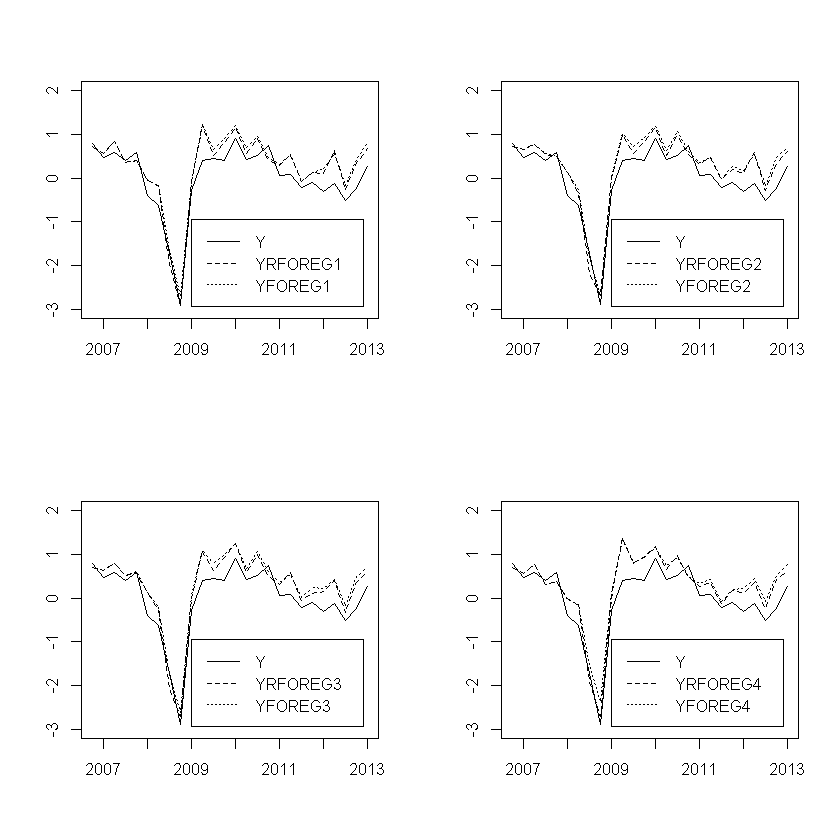

In [55]:
plot.label <- 2007:2013
par(mfrow=c(2, 2))
for (model in 1:4) {
  gdp.plot = cbind(data.table(fore_df$y),
                    data.table(gdp.rec[[model]]),
                    data.table(gdp.fore[[model]]))
  setnames(gdp.plot, c('Y', paste0('YRFOREG', model),
                       paste0('YFOREG', model)))
  
  plot(gdp.plot[[1]], type = 'n', xlab = '', ylab = '',
       xaxt = 'n', ylim = c(-3, 2))
  axis(1, at = c(0:6) * 4 + 2, labels = plot.label)
  for (l in 1:3) {
    lines(gdp.plot[[l]], lty = l)
  }
  legend('bottomright', legend = colnames(gdp.plot), inset = 0.05, lty = 1:3)
}

In [41]:
error_fore = list()
error_rec = list()
for (model in 1:4) {
    gdp.plot = cbind(data.table(fore_df$y),
                    data.table(gdp.rec[[model]]),
                    data.table(gdp.fore[[model]]))
    error_fore[model] = sum((gdp.plot[,1]-gdp.plot[,3])^2 / dim(gdp.plot[,3])[1]
    error_rec[model] = sum((gdp.plot[,1]-gdp.plot[,2])^2) / dim(gdp.plot[,2])[1]
}

In [42]:
error_fore

[[1]]
[1] 0.1474021

[[2]]
[1] 0.1430719

[[3]]
[1] 0.155979

[[4]]
[1] 0.1724308

In [47]:
sum(unlist(error_fore))

[1] 0.6188839

In [45]:
error_rec

[[1]]
[1] 0.1296345

[[2]]
[1] 0.1232725

[[3]]
[1] 0.1266294

[[4]]
[1] 0.1391431

In [48]:
sum(unlist(error_rec))

[1] 0.5186795



It can be seem from the above that model two has the lowest forecast error (0.14307) between the batch forecast method, and the lowest error (0.12327) between the recursive forecast method.

Furthermore, it can be seem that, as expected, the recursive method has consistently beaten the batch forecast method in terms of mean squared error across all models.

**(d) Compute confidence intervals for both (b) and (c) forecasts**

A typical parametric assumption of the LRM is:

$
\epsilon \sim N(0, \sigma^2 \mathbf{I})
$

this implies that the distribution of the OLS estimator can be written as:

$
\sqrt{T}(\hat{\beta}-\beta) \sim N(0, \sigma^2(\frac{X^{'}X}{T})^{-1})
$

and the forecast errors have the following distribution:

$
\frac{\mathbf{y}_{T+h} - \hat{\mathbf{y}}_{T+h}}{\sqrt{Var(e_{T+h})}} \sim N(0,1) \implies \mathbf{y}_{T+h} \sim N(\hat{\mathbf{y}}_{T+h}, Var(e_{T+h}))
$

This means that we can use the above density to construct confidence intervals for our forecasts. In particular, a $[1-\alpha]$% forecast interval is represented by:

$
[\hat{\mathbf{y}}_{T+h}-c_{\alpha/2}\sqrt{Var(e_{T+h})} ; \hat{\mathbf{y}}_{T+h}+c_{\alpha/2}\sqrt{Var(e_{T+h})}]
$

Therefore, for a 95% area interval we have that:

In [64]:
gdp.fore.ic.se = list()
gdp.fore.ic.up = list()
gdp.fore.ic.low = list()
for (i in 1:length(gdp.est)){
    gdp.fore.ic.se[[i]] = sqrt(sum(gdp.est[[1]]$residuals^2) / dim(fore_df)[1])
    gdp.fore.ic.up[[i]] = gdp.fore[[i]] + 1.96 * unlist(gdp.fore.ic.se)
    gdp.fore.ic.low[[i]] = gdp.fore[[i]] - 1.96 * unlist(gdp.fore.ic.se)
}

Warning message in gdp.fore[[i]] + 1.96 * unlist(gdp.fore.ic.se):
"longer object length is not a multiple of shorter object length"Warning message in gdp.fore[[i]] - 1.96 * unlist(gdp.fore.ic.se):
"longer object length is not a multiple of shorter object length"Warning message in gdp.fore[[i]] + 1.96 * unlist(gdp.fore.ic.se):
"longer object length is not a multiple of shorter object length"Warning message in gdp.fore[[i]] - 1.96 * unlist(gdp.fore.ic.se):
"longer object length is not a multiple of shorter object length"

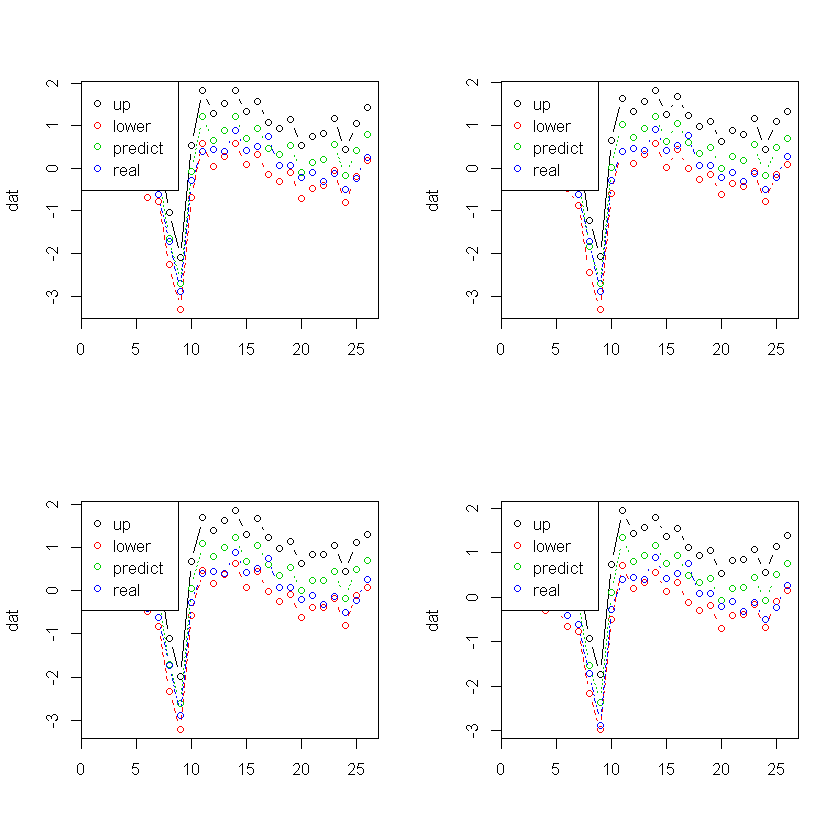

In [65]:
par(mfrow=c(2,2))

for (i in 1:length(gdp.est)){
    dat = cbind(gdp.fore.ic.up[[i]], gdp.fore.ic.low[[i]], gdp.fore[[i]], fore_df$y)
    colnames(dat) = names = c('up', 'lower', 'predict', 'real')    
    
    matplot(dat, type = c("b"),pch=1,col = 1:4)
    legend("topleft", legend=names, col=1:4, pch=1)
}
